# Transfer Learning

In [1]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [2]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Freezing the Base Model

In [3]:
base_model.trainable = False

## Adding New Layers

In [4]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
# Important to use binary crossentropy and binary accuracy as we now have a binary classification problem
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

In [8]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('data/presidential_doggy_door/train/', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('data/presidential_doggy_door/valid/', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

Found 139 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [9]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 12 steps, validate for 4 steps
Epoch 1/20
12/12 [==============================] - 22s 2s/step - loss: 1.1525 - binary_accuracy: 0.7604 - val_loss: 1.6440 - val_binary_accuracy: 0.6333
Epoch 2/20
12/12 [==============================] - 24s 2s/step - loss: 0.8180 - binary_accuracy: 0.8462 - val_loss: 1.2509 - val_binary_accuracy: 0.6333
Epoch 3/20
12/12 [==============================] - 27s 2s/step - loss: 0.5228 - binary_accuracy: 0.8333 - val_loss: 0.8250 - val_binary_accuracy: 0.7667
Epoch 4/20
12/12 [==============================] - 27s 2s/step - loss: 0.1838 - binary_accuracy: 0.9341 - val_loss: 0.5860 - val_binary_accuracy: 0.8333
Epoch 5/20
12/12 [==============================] - 27s 2s/step - loss: 0.1623 - binary_accuracy: 0.9451 - val_loss: 0.4840 - val_binary_accuracy: 0.8667
Epoch 6/20
12/12 [==============================] - 26s 2s/step - loss: 0.2107 - binary_accuracy: 0.9375 - val_loss: 0.3197 - val_binary_ac

In [10]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [11]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=5)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 12 steps, validate for 4 steps
Epoch 1/5
12/12 [==============================] - 88s 7s/step - loss: 0.0478 - binary_accuracy: 0.9896 - val_loss: 0.1338 - val_binary_accuracy: 0.9667
Epoch 2/5
12/12 [==============================] - 82s 7s/step - loss: 1.6597e-04 - binary_accuracy: 1.0000 - val_loss: 0.2034 - val_binary_accuracy: 0.9667
Epoch 3/5
12/12 [==============================] - 71s 6s/step - loss: 2.6695e-04 - binary_accuracy: 1.0000 - val_loss: 0.2188 - val_binary_accuracy: 0.9333
Epoch 4/5
12/12 [==============================] - 70s 6s/step - loss: 5.5139e-05 - binary_accuracy: 1.0000 - val_loss: 0.3975 - val_binary_accuracy: 0.9000
Epoch 5/5
12/12 [==============================] - 73s 6s/step - loss: 1.2993e-04 - binary_accuracy: 1.0000 - val_loss: 0.1446 - val_binary_accuracy: 0.9667


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

array([[-12.883249]], dtype=float32)

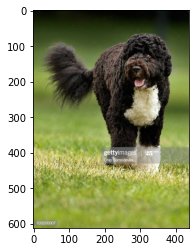

In [13]:
make_predictions('data/presidential_doggy_door/valid/bo/bo_20.jpg')

array([[24.985569]], dtype=float32)

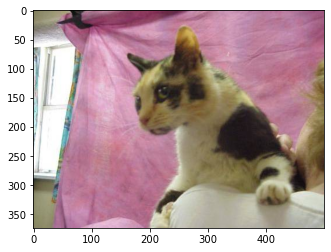

In [14]:
make_predictions('data/presidential_doggy_door/valid/not_bo/121.jpg')

In [15]:
def presidential_doggy_door(image_path):
    preds = make_predictions(image_path)
    if preds[0] < 0:
        print("It's Bo! Let him in!")
    else:
        print("That's not Bo! Stay out!")

That's not Bo! Stay out!


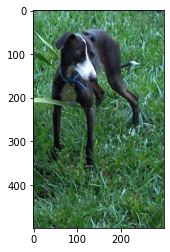

In [16]:
presidential_doggy_door('data/presidential_doggy_door/valid/not_bo/131.jpg')

It's Bo! Let him in!


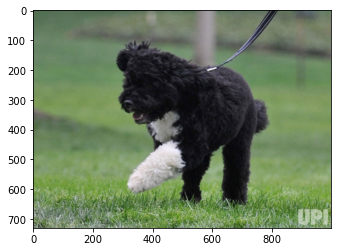

In [17]:
presidential_doggy_door('data/presidential_doggy_door/valid/bo/bo_29.jpg')

In [18]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}